# Symbolic algebra

## Introduction

First, we need to import a library for symbolic computation. We'll be using
`sympy` for this purpose. We'll also import `numpy` for a few comparisons.

I recommend avoiding `from sympy import *` (even though this is used in the
[`sympy` tutorial](http://docs.sympy.org/latest/tutorial/)), since we will
want to use some functions, like `sqrt`, from both a symbolic and a numeric
library.

In [1]:
import numpy as np
import sympy as sy

Sometimes we have an exact expression that is corrupted by
the numerical imprecision of a library like `numpy`. For example,
consider $\sqrt{3}$. `numpy` gives us a floating point approximation that doesn't
have all the properties we might like:

In [2]:
np.sqrt(3)

1.7320508075688772

In [3]:
np.sqrt(3)**2 - 3

-4.4408920985006262e-16

`sympy` gives us an object that has the properties we want:

In [4]:
sy.sqrt(3)

sqrt(3)

In [5]:
sy.sqrt(3)**2 - 3

0

`sympy` is also capable of displaying expressions in a more human-friendly
format.

In [6]:
sy.init_printing()

In [7]:
sy.sqrt(3)

The real power of `sympy` is the ability to manipulate variables. Some computer algebra
systems (CAS) allow the user to immediately input expressions with variables.

In [8]:
x + y

NameError: name 'x' is not defined

Since `sympy` is used within a full Python programming environment, we need to do a little
setup first and define some *Python* variables to function as our symbolic variables.

In [9]:
x, y, z = sy.symbols('x y z')
x, y, z

In [10]:
x + y

## Expressions

We can make all kinds of expressions in `sympy` using both arithmetic operators from Python
(to which `sympy` gives special meaning) and functions that `sympy` provides for us:

In [11]:
x * y + z **2

Just like with `sqrt`, `sympy` can hold exact values of `sin`, whereas `numpy` gives a floating-point
approximation:

In [12]:
sy.sin(x)**2 + sy.cos(x)**2

In [13]:
s2c2 = sy.sin(x)**2 + sy.cos(x)**2

### Simplification

A lot of times we want to manipulate an expression without changing what it represents. `sympy`
has a variety of functions for doing this. `simplify` is the most generic:

In [14]:
sy.simplify(sy.sin(x)**2 + sy.cos(x)**2)

In [15]:
sy.simplify(s2c2)

In [16]:
type(s2c2)

sympy.core.add.Add

In [17]:
type(x)

sympy.core.symbol.Symbol

Sometimes `sympy` doesn't automatically know what we mean by "simple", so there are functions to
put expressions in particular forms. For instance, we might want to expand $(x+y)(x-y)$ to
$x^2-y^2$:

In [18]:
expr = (x + y) * (x - y)
expr

In [19]:
sy.simplify(expr)

In [20]:
sy.expand(expr)

We might also want to go the other way:

In [21]:
sy.factor(x**2 - y**2)

See more examples in the tutorial section
[Simplification](http://docs.sympy.org/latest/tutorial/simplification.html).

### Example: checking a phase

Sometimes we want to verify properties of our expressions, e.g. show that the
magnitude of a complex phase is 1. Let's set up some real variables $a$ and $b$
for the real and imaginary parts of a complex number $c=a+ib$:

In [22]:
a, b = sy.symbols('a b', real=True)
a, b

`sympy` knows that $a$ and $b$ are real, so they remain unchanged when we take their complex conjugates:

In [23]:
a.conjugate()

In [24]:
x.conjugate()

Let's express the phase of $a+bi$ using `sympy`:

In [25]:
c = a + b * sy.I
c

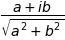

In [26]:
phase = sy.simplify(c / sy.sqrt(c * c.conjugate()))
phase

A complex phase $\omega$ has the property that $\omega\omega^*=1$. Let's see if
our expression satisfies that property:

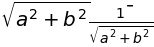

In [27]:
phase_mag = sy.simplify(phase * phase.conjugate())
phase_mag

`sympy` isn't realizing that $a^2+b^2$ is positive, and that therefore the conjugation doesn't do
anything. We can take `sympy` by the hand and manually point this out, first defining a
pair of expressions we know are equivalent:

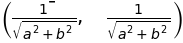

In [28]:
subpair = ((1 / sy.sqrt(a**2 + b**2)).conjugate(),
           1 / sy.sqrt(a**2 + b**2))
subpair

Then we can use `subs` to perform a substitution within our expression:

In [29]:
phase_mag.subs([subpair])

Sometimes you can force `sympy` to make simplifications that may note be justified
in general. For instance, you might think $x^zy^z$ should be the same as $(xy)^z$. It
is when $x,y,z$ are real, but `sympy` doesn't currently know they're real:

In [30]:
sy.powsimp((x*y)**z - x**z * y**z, force=True)

We can tell `sympy` to make simplifications that aren't justified in general by
supplying `force=True` to the `powsimp` function:

### Displaying expressions nicely

Sometimes we want to display our expressions with a little more context that `sympy` spits out.
We can use the rich HTML rendering system of jupyter notebooks together with the `latex`
export functionality provided by `sympy` to make our notebooks legible.

In [31]:
from IPython.display import HTML 

`latex` converts a `sympy` expression to LaTeX code:

In [32]:
sy.latex(phase)

'\\frac{a + i b}{\\sqrt{a^{2} + b^{2}}}'

If we want it rendered prettily, we need to wrap it in some math environment and explicitly use the
`HTML` function to format it for our notebook:

In [33]:
HTML('$' + sy.latex(c) + '$')

This is a little more verbose, but it allows us greater flexibilitym for instance adding
context to printing out the value of $c$:

In [34]:
HTML('$c=' + sy.latex(c) + '$')

We can even use advanced environments like align, but it will be helpful
to use raw string literals so we don't have to worry about all the `\`s:

In [35]:
HTML(r'\begin{align}|c|&=' + sy.latex(sy.sqrt(c * c.conjugate())) + 
     r'\\ \mathrm{sgn}(c)&=' + sy.latex(phase) + r'\end{align}')

You can also use this LaTeX in your paper. If you want to save the result of a calculation for
future manipulation, however, it's best not to use LaTeX (since it can be ambiguous). `sympy`'s
`srepr` function is better suited for this:

In [36]:
saved_phase = sy.srepr(phase)
saved_phase

"Mul(Add(Symbol('a', real=True), Mul(I, Symbol('b', real=True))), Pow(Add(Pow(Symbol('a', real=True), Integer(2)), Pow(Symbol('b', real=True), Integer(2))), Rational(-1, 2)))"

You can use `sympify` (not to be confused with `simplify`!) to convert an `srepr` string back to an expression:

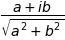

In [37]:
loaded_phase = sy.sympify(saved_phase)
loaded_phase

If you loaded an expression that has symbols you haven't defined yet,
you can get the new symbols from the expression in a
[set](https://docs.python.org/3/tutorial/datastructures.html#sets):

In [38]:
loaded_phase.free_symbols

You can also use [pickle](https://docs.python.org/3/library/pickle.html). I prefer
`srepr`, since although it's increadibly verbose it is in principle interpretable by
a human or other program without needing Python, whereas `pickle` is much more
dependent on Python specifically.

# Calculus
We can use computer algebra systems like `sympy` to do calculus. Here we will discuss, differentiation, integration and limits.

## Differentiation

First let us see `sympy` something simple. We know that the derivative of $e^{kx}$ with respect to $x$ is $k e^{kx}$. Let us see `sympy` do this. We take the following steps.

- Define a symbol `x`
- Define a symbol `k`
- Define a variable `f` which has the expression we want, using `sympy.exp` for the exponential function and usual `*` for multiplication and `/` for division.
- Use the function `sympy.diff` to differentiate `f` with respect to `x`.

Next let us try something more complicated. Consider the function $V(r) = \frac{C}{r}$, which is ubiquitous in physics. Let us imagine this is the electric potential of a point charge at the origin. We want the three Cartesian components of the Electric Field. We do this as follows.

- Define symbols `x`, `y`, `z`
- Define a symbol `r` using the function `sympy.sqrt`, that is `r = sympy.sqrt(x**2 + y**2 + z**2)`
- Define a symbol `C`
- Define `V` as the ratio of `C` and `r`.
- Define `Ex` to be the derivative of `V` with respect to `x`
- Define `Ey` to be the derivative of `V` with respect to `y`
- Define `Ez` to be the derivative of `V` with respect to `z`
- Display the values of `Ex`, `Ey` and `Ez` with the expression `(Ex, Ey, Ez)`


In [39]:
# Differentation of k*exp(k)
x = sy.Symbol('x')
k = sy.symbols('k')
exp_kx = sy.exp(k*x)
sy.diff(exp_kx, x)

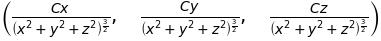

In [40]:
# Electric field of a point charge at the origin from the potential
x, y, z = sy.symbols('x, y, z')
r = sy.sqrt(x**2 + y**2 + z**2)
C = sy.Symbol('C')
V = C / r
Ex = -sy.diff(V, x)
Ey = -sy.diff(V, y)
Ez = -sy.diff(V, z)
(Ex, Ey, Ez)

## Integration

Computer algebra systems like `sympy` can perform definite and indefinite integration. 

First we look at definite integrals. Let us consider the is the following definite integral.
$$\int_{0}^{2\pi} d\phi (\sin(\phi))^2$$
We know the answer is $\pi$. Let us do this in `sympy`.

We do this as follows.
- Define a symbol `phi`
- Define an expression `sin_sq` which uses `sympy.sin` to compute the sine of a function symbolically
- Use `sympy.integrate` to integrate our function `sin_sq` with respect to `phi` from `0` to `2*sympy.pi`. Again, we denote the limits as `(phi, 0, 2*sympy.pi)`

In [41]:
# Definite integraion of (sin(phi))^2
phi = sy.symbols('phi')
sin_sq = sy.sin(phi)**2
sy.integrate(sin_sq, (phi, 0, 2*sy.pi))

Next we consider indefinite integration. We consider the following indefinite integral.
$$\int d\phi (\sin(\phi))^2$$
 
Let us do this in `sympy`. We do this as follows.
- Define a symbol `phi`
- Define an expression `sin_sq` which uses `sympy.sin` to compute the sine of a function symbolically
- Use `sympy.integrate` to integrate our function `sin_sq` with respect to `phi`. Again,  no limits are required as this is an an indefinite integral.

In [42]:
# Indefinite integration of (sin(phi))^2
phi = sy.symbols('phi')
sin_sq = sy.sin(phi)**2
sy.integrate(sin_sq, phi)

# Quantum Mechanics Examples

## Energy eigenfunctions for 1 dimensional harmonic oscillator

Let us do some quantum mechanics. We consider a particle of mass $M$ in a one dimensional quantum harmonic oscillator of frequency $\omega$. The Hamiltonian is $H = \frac{\hat{P}^2}{2M} + \frac{M\omega^2\hat{Q}^2}{2}$, where $\hat{P}$ and $\hat{Q}$ are the momentum and position operators respectively.

Choosing dimensionless momentum and position operators $\hat{p} = \sqrt{\frac{1}{M\hbar\omega}} \hat{P}$ and $\hat{q} = \sqrt{\frac{M\omega}{\hbar}} \hat{Q}$, the Hamiltonian becomes $H = \frac{\hbar\omega}{2}(\hat{p}^2 + \hat{q}^2)$.

Let $p$ and $p$ denote the eigenvalues of operators $\hat{p}$ and $\hat{q}$. Then the energy eigenfunctions in the position representation are $\psi_n(q) = C_n H_n(q) \exp\left(-\frac{1}{2}q^2\right)$. Here $C_n$ is the normalization factor, which we can find by integrating over all $q$ and $H_n(q)$ is the $n^{\text{th}}$ Hermite polynomial in $q$. Choosing a real $C_n$, we have

$$C_n = \left(\int_{-\infty}^{+\infty}dq \left|H_n(q) \exp\left(-\frac{1}{2}q^2\right)\right|^2\right)^{-1/2}$$

Let us normalize some of the energy eigenfunctions. Let us consider $n = 4$. We do this as follows.
- Define a variable `psi_un` denoting the unnormalizd function. Write `psi_un` using `sympy.special.polynomials.hermite` to get the $n^{\text{th}}$ Hermite polynomial and `sympy.exp` to get the exponential factor.
- Find `C_n` using the reciprocal of the square root of the integral of square of the absolute value of `psi_un`.
    - Use `sympy.Abs` to get the absolute value of `psi_un`. Square this using `**2` to get the square of absolute value.
    - Use `sympy.integrate` to integrate this over `x` from `- sympy.oo` to `+ sympy.oo`.
    - Use this in an expression for `C_n`.
- Write `psi` as a product of `C_n` and `psi_un`


In [43]:
# Normalization of 1 dimensional harmonic oscillator energy eigenfunctions
n = 4
x = sy.symbols('x')
hermite_n = sy.hermite(n, x)
psi_n_un = hermite_n * sy.exp(-x**2/2)
psi_n_un_norm = sy.integrate(sy.Abs(psi_n_un)**2, (x, -sy.oo, +sy.oo))
C_n = 1 / sy.sqrt(psi_n_un_norm)
psi_n = C_n * psi_n_un
psi_n

We have a way of finding the normalized energy eigenfunctions for a specific $n$. It would be great if we can do this for arbitrary values of $n$. To that end, let us define a function `psi_sho` which returns the $n^{\text{th}}$ energy eigenfunction (in both position and momentum representation as we are working with dimensionless position and momentum) using these ideas. We use a symbol `x`, which can be either `p` or `q`. We do this as follows.

- Define a function which takes a symbol `x` and an integer `n` as input
- Let `psi_un` be the unnormalized function. Write `psi_un` using `sympy.special.polynomials.hermite` to get the $n^{\text{th}}$ Hermite polynomial and `sympy.exp` to get the exponential factor.
- Find `C_n` using the reciprocal of the square root of the integral of square of the absolute value of `psi_un`.
    - Use `sympy.Abs` to get the absolute value of `psi_un`. Square this using `**2` to get the square of absolute value.
    - Use `sympy.integrate` to integrate this over `x` from `- sympy.oo` to `+ sympy.oo`.
    - Use this in an expression for `C_n`.
- Write `psi` as a product of `C_n` and `psi_un`
- Return `psi`

Now let us look at the expressions for the first few energy eigenfunctions. Let us do this using the code after the function we just defined. Go ahead and play with values inside the Python comprehension denoting the range of values for which to calculate the energy eigenfunctions.

In [44]:
# 1d Harmonic oscillator energy eigenfunctions.
def psi_sho(n, x):
    '''
    Parameters
    ----------
    n: integer 
    Quantum number denoting which energy eigenfunction
    
    x: sympy.Symbol
    Symbol denoting the dimensionless parameter which
    is the argument of the energy eigenfunction
    
    Returns
    -------
    psi:
    Expression representing the n th energy eigen function
    '''
    psi_un = sy.exp(-x**2/2) * sy.special.polynomials.hermite(n, x)
    psi_un_norm = sy.integrate(sy.Abs(psi_un)**2, (x, -sy.oo, +sy.oo) )
    C_n = 1/sy.sqrt(psi_un_norm)
    
    psi = C_n * psi_un
    return psi
    
# Compute some of the Harmonic oscillator eigenfunctions functions
x = sy.Symbol('x')
[psi_sho(n, x) for n in range(11, 16)]

## Finding eigenvalues of matrices

### Tensor products

Let's say I want to know the eigenvalues of $a_H+a_H^\dagger$, where
$a_H=\sqrt{s^2+1}\,\sigma_-^{(1)}-s\,\sigma_+^{(2)}$.

First let's define the standard single-qubit vectors and operators $\left|g\right\rangle$,
$\left|e\right\rangle$, $\sigma_-=\left|g\middle\rangle\middle\langle e\right|$,
$\sigma_+=\sigma_-^\dagger$:

In [45]:
ket_g = sy.Matrix([0, 1])
ket_e = sy.Matrix([1, 0])
ket_g, ket_e

⎛⎡0⎤, ⎡1⎤⎞
⎜⎢ ⎥  ⎢ ⎥⎟
⎝⎣1⎦  ⎣0⎦⎠

In [46]:
sm = ket_g * ket_e.H
sm

⎡0  0⎤
⎢    ⎥
⎣1  0⎦

In [47]:
sp = sm.H
HTML(r'$\sigma_+=' + sy.latex(sp) + '$')

We need a way to deal with tensor product structure for $\sigma_\pm^{(n)}$.
Fortunately the `physics.quantum` module provides support for this:

In [48]:
from sympy.physics.quantum import TensorProduct

In [49]:
Id = sy.eye(2)
Id

⎡1  0⎤
⎢    ⎥
⎣0  1⎦

In [50]:
sm1 = TensorProduct(sm, Id)
sm1

⎡0  0  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢1  0  0  0⎥
⎢          ⎥
⎣0  1  0  0⎦

In [51]:
sp2 = TensorProduct(Id, sp)
sp2

⎡0  1  0  0⎤
⎢          ⎥
⎢0  0  0  0⎥
⎢          ⎥
⎢0  0  0  1⎥
⎢          ⎥
⎣0  0  0  0⎦

Then we make a symbol for $s$ and build $a_H=\sqrt{s^2+1}\,\sigma_-^{(1)}-s\,\sigma_+^{(2)}$
and $X_H=a_H+a_H^\dagger$:

In [52]:
s = sy.symbols('s', positive=True)
s

In [53]:
aH = sy.sqrt(s**2 + 1) * sm1 - s * sp2
aH

⎡     0           -s       0  0 ⎤
⎢                               ⎥
⎢     0            0       0  0 ⎥
⎢                               ⎥
⎢   ________                    ⎥
⎢  ╱  2                         ⎥
⎢╲╱  s  + 1        0       0  -s⎥
⎢                               ⎥
⎢                ________       ⎥
⎢               ╱  2            ⎥
⎣     0       ╲╱  s  + 1   0  0 ⎦

In [54]:
XH = aH + aH.H
XH

⎡                             ________             ⎤
⎢                            ╱  2                  ⎥
⎢     0           -s       ╲╱  s  + 1        0     ⎥
⎢                                                  ⎥
⎢                                          ________⎥
⎢                                         ╱  2     ⎥
⎢    -s            0            0       ╲╱  s  + 1 ⎥
⎢                                                  ⎥
⎢   ________                                       ⎥
⎢  ╱  2                                            ⎥
⎢╲╱  s  + 1        0            0           -s     ⎥
⎢                                                  ⎥
⎢                ________                          ⎥
⎢               ╱  2                               ⎥
⎣     0       ╲╱  s  + 1       -s            0     ⎦

We can display $X_H$ with some context using `HTML`:

In [55]:
HTML(r'$X_H=' + sy.latex(XH) + '$')

Now we are ready to solve for eigenvalues and eigenvectors:

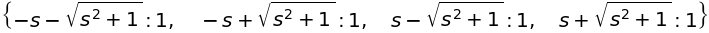

In [56]:
XH.eigenvals()

In [57]:
eigendecomp = XH.eigenvects()

In [58]:
eigenvectors = [sy.simplify(element[2][0]) for element in eigendecomp]
eigenvectors

⎡⎡-1⎤, ⎡1⎤, ⎡1 ⎤, ⎡-1⎤⎤
⎢⎢  ⎥  ⎢ ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-1⎥  ⎢1⎥  ⎢-1⎥  ⎢1 ⎥⎥
⎢⎢  ⎥  ⎢ ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢1⎥  ⎢-1⎥  ⎢-1⎥⎥
⎢⎢  ⎥  ⎢ ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣1 ⎦  ⎣1⎦  ⎣1 ⎦  ⎣1 ⎦⎦

### State update

Suppose we have Kraus operators $K_\pm=\frac{1}{2}(I\pm\epsilon\sigma_z)$,
and we want to know what our updated state

\begin{align}
    \rho_\pm&=\frac{K_\pm\rho K_\pm^\dagger}{\operatorname{tr}[K_\pm^\dagger K_\pm\rho]}
\end{align}

will look like.

First let's define Pauli operators

\begin{align}
    \sigma_x&=\sigma_++\sigma_- \\
    \sigma_y&=-i\sigma_++i\sigma_- \\
    \sigma_z&=I-2\sigma_-\sigma_+
\end{align}

In [59]:
X = sp + sm
Y = -sy.I * sp + sy.I * sm
Z = Id - 2 * sm * sp
X, Y, Z

⎛⎡0  1⎤, ⎡0  -ⅈ⎤, ⎡1  0 ⎤⎞
⎜⎢    ⎥  ⎢     ⎥  ⎢     ⎥⎟
⎝⎣1  0⎦  ⎣ⅈ  0 ⎦  ⎣0  -1⎦⎠

Then build $\rho$ and $K_\pm$ out of these operators.

In [60]:
x, y, z = sy.symbols('x y z', real=True)
eps = sy.symbols('epsilon', positive=True)

rho = (Id + x * X + y * Y + z * Z) / 2
Kp = (Id + eps * Z) / 2
Km = (Id - eps * Z) / 2

rho, Kp, Km

⎛⎡ z   1   x   ⅈ⋅y⎤  ⎡ε   1         ⎤  ⎡  ε   1       ⎤⎞
⎜⎢ ─ + ─   ─ - ───⎥, ⎢─ + ─     0   ⎥, ⎢- ─ + ─    0  ⎥⎟
⎜⎢ 2   2   2    2 ⎥  ⎢2   2         ⎥  ⎢  2   2       ⎥⎟
⎜⎢                ⎥  ⎢              ⎥  ⎢              ⎥⎟
⎜⎢x   ⅈ⋅y    z   1⎥  ⎢         ε   1⎥  ⎢         ε   1⎥⎟
⎜⎢─ + ───  - ─ + ─⎥  ⎢  0    - ─ + ─⎥  ⎢   0     ─ + ─⎥⎟
⎝⎣2    2     2   2⎦  ⎣         2   2⎦  ⎣         2   2⎦⎠

Finally, calculate the state update:

In [61]:
rho_p = sy.simplify(Kp.H * rho * Kp / sy.trace(Kp.H * Kp * rho))
rho_p

⎡                 2                                                      ⎤
⎢         -(ε + 1) ⋅(z + 1)                (ε - 1)⋅(ε + 1)⋅(x - ⅈ⋅y)     ⎥
⎢───────────────────────────────────  ───────────────────────────────────⎥
⎢       2                  2                 2                  2        ⎥
⎢(ε - 1) ⋅(z - 1) - (ε + 1) ⋅(z + 1)  (ε - 1) ⋅(z - 1) - (ε + 1) ⋅(z + 1)⎥
⎢                                                                        ⎥
⎢                                                      2                 ⎥
⎢     (ε - 1)⋅(ε + 1)⋅(x + ⅈ⋅y)                 (ε - 1) ⋅(z - 1)         ⎥
⎢───────────────────────────────────  ───────────────────────────────────⎥
⎢       2                  2                 2                  2        ⎥
⎣(ε - 1) ⋅(z - 1) - (ε + 1) ⋅(z + 1)  (ε - 1) ⋅(z - 1) - (ε + 1) ⋅(z + 1)⎦

If $\epsilon$ is small, we might only want to keep track of terms up to a certain
order in $\epsilon$. Let's expand the denominator to second order in $\epsilon$
using `series`:

In [62]:
denom_series = sy.series(1 / sy.trace(Kp.H * Kp * rho), eps, n=3)
denom_series

The numerator is already only second order in $\epsilon$:

In [63]:
numerator = sy.expand(Kp.H * rho * Kp, eps)
numerator

⎡ 2      2                         2        2              ⎤
⎢ε ⋅z   ε    ε⋅z   ε   z   1      ε ⋅x   ⅈ⋅ε ⋅y   x   ⅈ⋅y  ⎥
⎢──── + ── + ─── + ─ + ─ + ─    - ──── + ────── + ─ - ───  ⎥
⎢ 8     8     4    4   8   8       8       8      8    8   ⎥
⎢                                                          ⎥
⎢    2        2                  2      2                  ⎥
⎢   ε ⋅x   ⅈ⋅ε ⋅y   x   ⅈ⋅y     ε ⋅z   ε    ε⋅z   ε   z   1⎥
⎢ - ──── - ────── + ─ + ───   - ──── + ── + ─── - ─ - ─ + ─⎥
⎣    8       8      8    8       8     8     4    4   8   8⎦

When we multiply the two terms together, the $\mathcal{O}(\epsilon^3)$ term swallows up
higher order products automatically:

In [64]:
rho_p_series = sy.expand(numerator * denom_series)
rho_p_series

⎡                1   z          2      2        2  3    ⎛ 3⎞                  
⎢                ─ + ─ + ε - ε⋅z  - 2⋅ε ⋅z + 2⋅ε ⋅z  + O⎝ε ⎠                  
⎢                2   2                                                        
⎢                                                                             
⎢ⅈ⋅y   x                        2          2    2    2        2    2    ⎛ 3⎞  
⎢─── + ─ - ⅈ⋅ε⋅y⋅z - ε⋅x⋅z - ⅈ⋅ε ⋅y + 2⋅ⅈ⋅ε ⋅y⋅z  - ε ⋅x + 2⋅ε ⋅x⋅z  + O⎝ε ⎠  
⎣ 2    2                                                                      

  ⅈ⋅y   x                        2          2    2    2        2    2    ⎛ 3⎞⎤
- ─── + ─ + ⅈ⋅ε⋅y⋅z - ε⋅x⋅z + ⅈ⋅ε ⋅y - 2⋅ⅈ⋅ε ⋅y⋅z  - ε ⋅x + 2⋅ε ⋅x⋅z  + O⎝ε ⎠⎥
   2    2                                                                    ⎥
                                                                             ⎥
                 1   z          2      2        2  3    ⎛ 3⎞                 ⎥
                 ─ - ─ - ε + ε⋅z  + 2⋅ε ⋅z - 2⋅ε ⋅z

We can also check properties of our updated state, such as its trace:

In [65]:
sy.trace(rho_p_series)

# Limits

Often the notation of differential calculus does not sweep out the intricacies of calculating limits of expressions, for example while calculating residues or limiting values of complicated expressions. 

Let us start with a simple example, the limit of function $\frac{\sin(x)}{x}$ as $x \to 0$. In `sympy`, we do the following.

- Define a symbol `x`.
- Using the function `sympy.sinc`, which is the unnormalized sinc function [https://en.wikipedia.org/wiki/Sinc_function]
- Use `sympy.limit` to find the limit of `sinc_unorm` at `x` goes to 0.

Now let us consider the normalized sinc function $\frac{\sin(\pi x)}{\pi x}$ and its limit as $x \to 0$. For this we need to define our own function `sinc_norm` which is the normalized sinc function. See, for instance, [https://en.wikipedia.org/wiki/Sinc_function]. We do the following

- Define a symbol `x`.
- Using the function `sympy.sin` and the symbol `sympy.pi`, define a function `sinc_norm` which is the unnormalized sinc function [https://en.wikipedia.org/wiki/Sinc_function]
- Use `sympy.limit` to find the limit of `sinc_norm` at `x` goes to 0.

Note for those who use MATLAB/Octave: in MATLAB/Octave, the `sinc` function is the normalized sinc function.

Next we consider an expression of the form $\frac{e^{-kr}}{r}$. We want to find its limiting value as $r \to \infty$. We assume $k > 0$. For this we do the following.
- Define a symbol `x`
- Define a symbol `k`. Declare it to be positive, using `positive=True` as an argument of `sympy.Symbol`
- Use the function `sympy.exp` to define a function `exp_kr_over_r` which represents the expression  $\frac{e^{-kr}}{r}$
- Use `sympy.limit` to find the limit of `exp_kr_over_r` at `x` goes to `sympy.oo`. Here `sympy.oo` is the symbol which `sympy` uses to represent $\infty$.


In [66]:
# Limit of sin(x)/(x) as x goes to 0
x = sy.Symbol('x')
sinc_unorm = sy.sinc(x)
sy.limit(sinc_unorm, x, 0)

In [67]:
# Limit of sin(pi*x)/(pi*x) as x goes to 0
x = sy.Symbol('x')
sinc_norm = sy.sin(sy.pi*x) / (sy.pi * x)
sy.limit(sinc_norm, x, 0)

In [68]:
# Limit of exp(-k*r)/r as r goes to infinity
r = sy.Symbol('r')
k = sy.Symbol('k', positive=True)
exp_kr_over_r = sy.exp(-k*r) / r
sy.limit(exp_kr_over_r, r, sy.oo)